In [224]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from keras.utils.vis_utils import plot_model
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score
import sklearn.metrics as mt
from time import time
from matplotlib.pyplot import figure
import warnings
warnings.filterwarnings('ignore')

In [5]:
super_conduct = pd.read_csv('all_train.csv')
super_conduct.head()

,# label,f0,f1,f2,f3,f4,f5,f6,f7,f8,...,f18,f19,f20,f21,f22,f23,f24,f25,f26,mass
0,1.0,-0.346368,0.416306,0.999236,0.475342,0.427493,-0.005984,1.989833,0.344530,1.566297,...,4.105282,0.267826,0.378718,1.743123,3.406367,4.350537,-0.352571,1.130032,2.227706,1000.0
1,1.0,1.708236,-0.319394,-1.241873,-0.887231,-0.871906,-0.005984,-0.001047,-1.038225,0.655748,...,-1.178141,-0.877361,-1.483769,-0.573682,-1.693781,-0.545062,-0.299118,-0.662942,-0.193019,750.0
2,0.0,-0.360693,1.794174,0.264738,-0.472273,-0.292344,-1.054221,-1.150495,1.423404,1.270098,...,-1.199511,0.539020,-1.590629,-0.573682,-0.543636,-0.937456,-0.300344,-0.523262,-1.506304,750.0
3,1.0,-0.377914,-0.103932,-0.649434,-2.125015,-1.643797,-0.005984,1.011112,-1.040340,-0.541991,...,0.463763,-0.006583,1.089122,-0.573682,-0.276348,-0.409272,-0.349926,-0.307123,0.529698,1250.0
4,0.0,-0.067436,-0.636762,-0.620166,-0.062551,1.588715,-0.005984,-0.595304,-1.238987,0.336844,...,-0.552837,-1.418494,-0.562982,1.743123,0.881802,0.002516,1.560950,-0.150760,-1.023889,750.0


In [7]:
super_conduct.isna().mean()

# label    0.0
f0         0.0
f1         0.0
f2         0.0
f3         0.0
f4         0.0
f5         0.0
f6         0.0
f7         0.0
f8         0.0
f9         0.0
f10        0.0
f11        0.0
f12        0.0
f13        0.0
f14        0.0
f15        0.0
f16        0.0
f17        0.0
f18        0.0
f19        0.0
f20        0.0
f21        0.0
f22        0.0
f23        0.0
f24        0.0
f25        0.0
f26        0.0
mass       0.0
dtype: float64

In [32]:
super_conduct.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7000000 entries, 0 to 6999999
Data columns (total 29 columns):
 #   Column   Dtype  
---  ------   -----  
 0   # label  float64
 1   f0       float64
 2   f1       float64
 3   f2       float64
 4   f3       float64
 5   f4       float64
 6   f5       float64
 7   f6       float64
 8   f7       float64
 9   f8       float64
 10  f9       float64
 11  f10      float64
 12  f11      float64
 13  f12      float64
 14  f13      float64
 15  f14      float64
 16  f15      float64
 17  f16      float64
 18  f17      float64
 19  f18      float64
 20  f19      float64
 21  f20      float64
 22  f21      float64
 23  f22      float64
 24  f23      float64
 25  f24      float64
 26  f25      float64
 27  f26      float64
 28  mass     float64
dtypes: float64(29)
memory usage: 1.5 GB


In [8]:
super_conduct.shape

(7000000, 29)

In [35]:
super_conduct['# label']= super_conduct['# label'].astype('int')

In [36]:
super_conduct['# label'].value_counts()

1    3500879
0    3499121
Name: # label, dtype: int64

In [37]:
X = super_conduct.drop(['# label'], axis=1).copy()
y = super_conduct['# label']

In [15]:
scl = StandardScaler()
X_scl = scl.fit_transform(X)

In [17]:
X_scl.shape

(7000000, 28)

In [38]:
X_train, X_test, y_train, y_test= train_test_split(X_scl, y, shuffle=True, stratify=y, random_state=1, test_size=.2)

### Sequential model

In [116]:
model_seq = tf.keras.Sequential()

In [117]:
model_seq.add(tf.keras.Input(shape=(28,)))
model_seq.add(tf.keras.layers.Dense(100, activation='relu'))
model_seq.add(tf.keras.layers.Dense(100, activation='relu'))
model_seq.add(tf.keras.layers.Dense(100, activation='relu'))
model_seq.add(tf.keras.layers.Dense(100, activation='relu'))
model_seq.add(tf.keras.layers.Dense(1, activation='sigmoid')) #Binary activation

In [118]:
#Define early stopping
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=.001, patience=5, restore_best_weights=True)

In [132]:
#Define model check point
fname = 'my_best_model.epoch{epoch:02d}-loss{val_loss:.2f}.hdf5'
checkpoint = tf.keras.callbacks.ModelCheckpoint(filepath=fname, monitor='val_loss', mode='min', save_best_only=True)

In [133]:
model_seq.compile(optimizer='adam', loss='BinaryCrossentropy', metrics='accuracy') #Binary classification

In [134]:
model_history = model_seq.fit(X_train, y_train, validation_data=(X_test, y_test), batch_size=128, epochs=1000, 
                              callbacks=[early_stop, checkpoint])

Epoch 1/1000
43750/43750 [==============================] - 52s 1ms/step - loss: 0.2624 - accuracy: 0.8821 - val_loss: 0.2629 - val_accuracy: 0.8821
Epoch 2/1000
43750/43750 [==============================] - 51s 1ms/step - loss: 0.2614 - accuracy: 0.8826 - val_loss: 0.2623 - val_accuracy: 0.8825
Epoch 3/1000
43750/43750 [==============================] - 58s 1ms/step - loss: 0.2608 - accuracy: 0.8830 - val_loss: 0.2626 - val_accuracy: 0.8824
Epoch 4/1000
43750/43750 [==============================] - 52s 1ms/step - loss: 0.2603 - accuracy: 0.8832 - val_loss: 0.2611 - val_accuracy: 0.8830
Epoch 5/1000
43750/43750 [==============================] - 50s 1ms/step - loss: 0.2599 - accuracy: 0.8835 - val_loss: 0.2609 - val_accuracy: 0.8833
Epoch 6/1000
43750/43750 [==============================] - 52s 1ms/step - loss: 0.2596 - accuracy: 0.8836 - val_loss: 0.2605 - val_accuracy: 0.8833
Epoch 7/1000
43750/43750 [==============================] - 54s 1ms/step - loss: 0.2593 - accuracy: 0.8839

In [135]:
model_seq.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_33 (Dense)             (None, 100)               2900      
_________________________________________________________________
dense_34 (Dense)             (None, 100)               10100     
_________________________________________________________________
dense_35 (Dense)             (None, 100)               10100     
_________________________________________________________________
dense_36 (Dense)             (None, 100)               10100     
_________________________________________________________________
dense_37 (Dense)             (None, 1)                 101       
Total params: 33,301
Trainable params: 33,301
Non-trainable params: 0
_________________________________________________________________


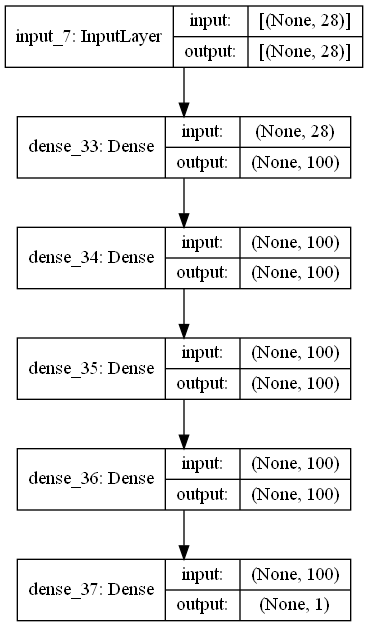

In [136]:
plot_model(model_seq, show_shapes=True)

In [57]:
def plot_training_curves(history, title=None):
    ''' Plot the training curves for loss and accuracy given a model history
    '''
    # find the minimum loss epoch
    minimum = np.min(history.history['val_loss'])
    min_loc = np.where(minimum == history.history['val_loss'])[0]
    # get the vline y-min and y-max
    loss_min, loss_max = (min(history.history['val_loss'] + history.history['loss']),
                          max(history.history['val_loss'] + history.history['loss']))
    acc_min, acc_max = (min(history.history['val_accuracy'] + history.history['accuracy']),
                        max(history.history['val_accuracy'] + history.history['accuracy']))
    # create figure
    fig, ax = plt.subplots(ncols=2, figsize = (15,7))
    fig.suptitle(title)
    index = np.arange(1, len(history.history['accuracy']) + 1)
    # plot the loss and validation loss
    ax[0].plot(index, history.history['loss'], label = 'loss')
    ax[0].plot(index, history.history['val_loss'], label = 'val_loss')
    ax[0].vlines(min_loc + 1, loss_min, loss_max, label = 'min_loss_location',linestyle='dashed')
    ax[0].set_title('Loss')
    ax[0].set_ylabel('Loss')
    ax[0].set_xlabel('Epochs')
    ax[0].legend()
    # plot the accuracy and validation accuracy
    ax[1].plot(index, history.history['accuracy'], label = 'accuracy')
    ax[1].plot(index, history.history['val_accuracy'], label = 'val_accuracy')
    ax[1].vlines(min_loc + 1, acc_min, acc_max, label = 'min loss Epoch',linestyle='dashed')
    ax[1].set_title('Accuracy')
    ax[1].set_ylabel('Accuracy')
    ax[1].set_xlabel('Epochs')
    ax[1].legend()
    plt.show()

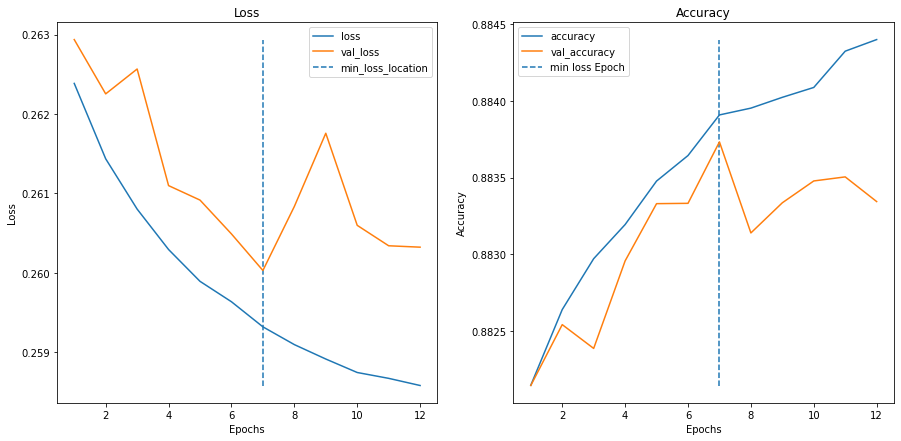

In [137]:
plot_training_curves(model_history)

In [138]:
pred_seq = model_seq.predict(X_test)

In [139]:
print(mt.classification_report(y_test, np.rint(pred_seq)))
print('\n')
print('Confusion Matrix: \n', mt.confusion_matrix(y_test, np.rint(pred_seq)))
print('\n')
print('Accuracy: \n', mt.accuracy_score(y_test, np.rint(pred_seq)))

              precision    recall  f1-score   support

           0       0.90      0.86      0.88    699824
           1       0.87      0.91      0.89    700176

    accuracy                           0.88   1400000
   macro avg       0.88      0.88      0.88   1400000
weighted avg       0.88      0.88      0.88   1400000



Confusion Matrix: 
 [[602697  97127]
 [ 65648 634528]]


Accuracy: 
 0.8837321428571429


In [140]:
recall = mt.recall_score(y_test, np.rint(pred_seq))
print("recall\n",recall)

recall
 0.9062407166198213


In [141]:
precision = mt.precision_score(y_test, np.rint(pred_seq))
print("precision\n",precision)

precision
 0.8672502750613336


### Model API

In [234]:
tb = tf.keras.callbacks.TensorBoard(log_dir=f"logs/fit\\{time()}")

In [235]:
%load_ext tensorboard

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


In [237]:
%tensorboard --logdir logs/fit

Reusing TensorBoard on port 6006 (pid 11624), started 11:42:33 ago. (Use '!kill 11624' to kill it.)

In [144]:
model_api = tf.keras.Model()

In [145]:
inputs = tf.keras.Input(shape=(28,))
layer1 = tf.keras.layers.Dense(100, activation='relu')(inputs)
layer2 = tf.keras.layers.Dense(100, activation='relu')(layer1)
layer3 = tf.keras.layers.Dense(100, activation='relu')(layer2)
layer4 = tf.keras.layers.Dense(100, activation='relu')(layer3)
layer5 = tf.keras.layers.Dense(100, activation='relu')(layer4)
outputs = tf.keras.layers.Dense(1, activation='sigmoid')(layer5)
model_api = tf.keras.Model(inputs=inputs, outputs=outputs)
model_api.compile(optimizer='adam', loss='BinaryCrossentropy', metrics='accuracy')

In [146]:
model_history = model_api.fit(X_train, y_train, validation_data=(X_test, y_test), batch_size=128, epochs=1000, 
                              callbacks=[tb, early_stop, checkpoint])

Epoch 1/1000
43750/43750 [==============================] - 59s 1ms/step - loss: 0.2759 - accuracy: 0.8746 - val_loss: 0.2678 - val_accuracy: 0.8795
Epoch 2/1000
43750/43750 [==============================] - 60s 1ms/step - loss: 0.2657 - accuracy: 0.8804 - val_loss: 0.2653 - val_accuracy: 0.8810
Epoch 3/1000
43750/43750 [==============================] - 62s 1ms/step - loss: 0.2633 - accuracy: 0.8815 - val_loss: 0.2630 - val_accuracy: 0.8816
Epoch 4/1000
43750/43750 [==============================] - 64s 1ms/step - loss: 0.2618 - accuracy: 0.8823 - val_loss: 0.2633 - val_accuracy: 0.8820
Epoch 5/1000
43750/43750 [==============================] - 67s 2ms/step - loss: 0.2608 - accuracy: 0.8828 - val_loss: 0.2623 - val_accuracy: 0.8827
Epoch 6/1000
43750/43750 [==============================] - 70s 2ms/step - loss: 0.2600 - accuracy: 0.8833 - val_loss: 0.2610 - val_accuracy: 0.8830
Epoch 7/1000
43750/43750 [==============================] - 66s 2ms/step - loss: 0.2594 - accuracy: 0.8836

In [202]:
pred_model = model_api.predict(X_test)
pred_model = np.rint(pred_model)

In [203]:
print(mt.classification_report(y_test, pred_model))
print('\n')
print('Confusion Matrix: \n', mt.confusion_matrix(y_test, pred_model))
print('\n')
print('Accuracy: \n', mt.accuracy_score(y_test, pred_model))

              precision    recall  f1-score   support

           0       0.89      0.87      0.88    699824
           1       0.87      0.90      0.89    700176

    accuracy                           0.88   1400000
   macro avg       0.88      0.88      0.88   1400000
weighted avg       0.88      0.88      0.88   1400000



Confusion Matrix: 
 [[609341  90483]
 [ 71707 628469]]


Accuracy: 
 0.88415


In [204]:
recall = mt.recall_score(y_test, pred_model)
print("recall\n",recall)

recall
 0.8975871780809397


In [205]:
precision = mt.precision_score(y_test, pred_model)
print("precision\n",precision)

precision
 0.8741459791474256


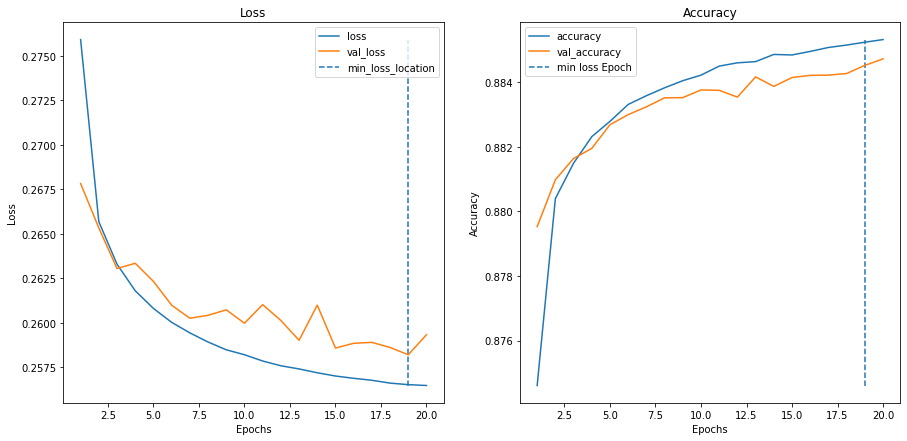

In [151]:
plot_training_curves(model_history)

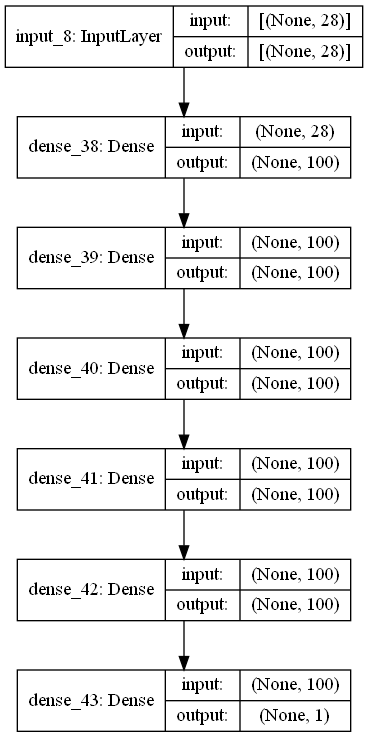

In [152]:
plot_model(model_api, show_shapes=True)

In [153]:
model_api.summary()

Model: "model_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_8 (InputLayer)         [(None, 28)]              0         
_________________________________________________________________
dense_38 (Dense)             (None, 100)               2900      
_________________________________________________________________
dense_39 (Dense)             (None, 100)               10100     
_________________________________________________________________
dense_40 (Dense)             (None, 100)               10100     
_________________________________________________________________
dense_41 (Dense)             (None, 100)               10100     
_________________________________________________________________
dense_42 (Dense)             (None, 100)               10100     
_________________________________________________________________
dense_43 (Dense)             (None, 1)                 101 

### Use Leaky RELU

In [154]:
inputs = tf.keras.Input(shape=(28,))
layer1 = tf.keras.layers.Dense(100)(inputs)
layer2 = tf.keras.layers.LeakyReLU(alpha=.1)(layer1)
layer3 = tf.keras.layers.Dense(100)(layer2)
layer4 = tf.keras.layers.LeakyReLU(alpha=.1)(layer3)
layer5 = tf.keras.layers.Dense(100)(layer4)
layer6 = tf.keras.layers.LeakyReLU(alpha=.1)(layer5)
layer7 = tf.keras.layers.Dense(100)(layer6)
layer8 = tf.keras.layers.LeakyReLU(alpha=.1)(layer7)
outputs = tf.keras.layers.Dense(1, activation='sigmoid')(layer8)
model_leaky = tf.keras.Model(inputs=inputs, outputs=outputs)
model_leaky.compile(optimizer='adam', loss='BinaryCrossentropy', metrics='accuracy')

In [155]:
model_history_leaky = model_leaky.fit(X_train, y_train, validation_data=(X_test, y_test), batch_size=128, epochs=1000, 
                              callbacks=[tb, early_stop, checkpoint])

Epoch 1/1000
43750/43750 [==============================] - 60s 1ms/step - loss: 0.2764 - accuracy: 0.8742 - val_loss: 0.2683 - val_accuracy: 0.8790
Epoch 2/1000
43750/43750 [==============================] - 64s 1ms/step - loss: 0.2664 - accuracy: 0.8798 - val_loss: 0.2651 - val_accuracy: 0.8809
Epoch 3/1000
43750/43750 [==============================] - 65s 1ms/step - loss: 0.2641 - accuracy: 0.8812 - val_loss: 0.2644 - val_accuracy: 0.8815
Epoch 4/1000
43750/43750 [==============================] - 62s 1ms/step - loss: 0.2627 - accuracy: 0.8819 - val_loss: 0.2626 - val_accuracy: 0.8824
Epoch 5/1000
43750/43750 [==============================] - 61s 1ms/step - loss: 0.2617 - accuracy: 0.8825 - val_loss: 0.2631 - val_accuracy: 0.8823
Epoch 6/1000
43750/43750 [==============================] - 62s 1ms/step - loss: 0.2611 - accuracy: 0.8828 - val_loss: 0.2621 - val_accuracy: 0.8825
Epoch 7/1000
43750/43750 [==============================] - 63s 1ms/step - loss: 0.2605 - accuracy: 0.8831

In [156]:
pred_leaky = model_leaky.predict(X_test)

In [157]:
print(mt.classification_report(y_test, np.rint(pred_leaky)))
print('\n')
print('Confusion Matrix: \n', mt.confusion_matrix(y_test, np.rint(pred_leaky)))
print('\n')
print('Accuracy: \n', mt.accuracy_score(y_test, np.rint(pred_leaky)))

              precision    recall  f1-score   support

           0       0.90      0.86      0.88    699824
           1       0.87      0.91      0.89    700176

    accuracy                           0.88   1400000
   macro avg       0.88      0.88      0.88   1400000
weighted avg       0.88      0.88      0.88   1400000



Confusion Matrix: 
 [[601398  98426]
 [ 65142 635034]]


Accuracy: 
 0.8831657142857143


In [158]:
recall = mt.recall_score(y_test, np.rint(pred_leaky))
print("recall\n",recall)

recall
 0.9069633920614245


In [159]:
precision = mt.precision_score(y_test, np.rint(pred_leaky))
print("precision\n",precision)

precision
 0.8658059062525564


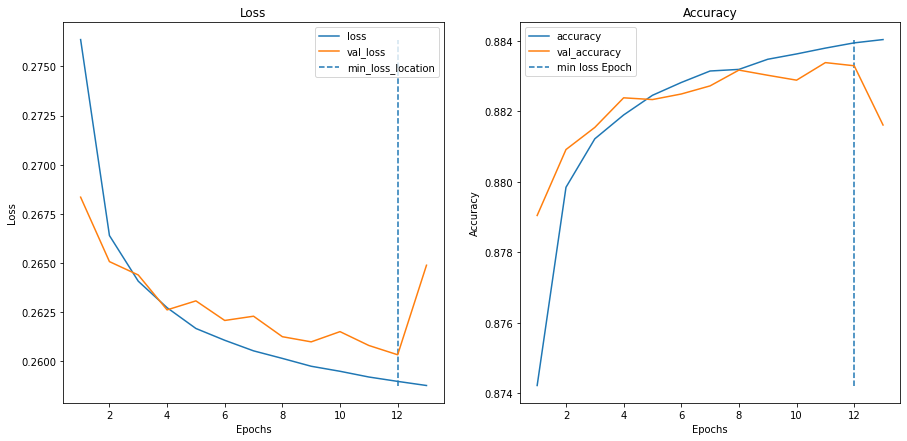

In [160]:
plot_training_curves(model_history_leaky)

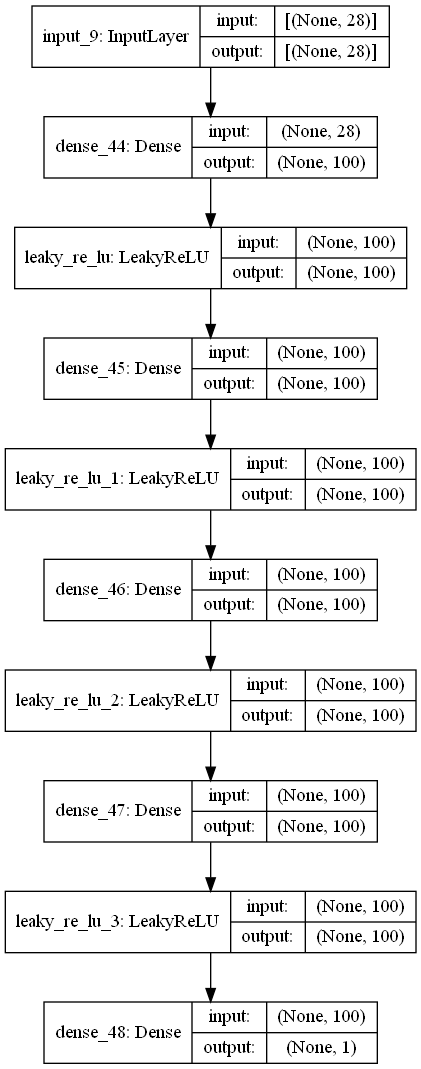

In [161]:
plot_model(model_leaky, show_shapes=True)

In [162]:
model_leaky.summary()

Model: "model_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_9 (InputLayer)         [(None, 28)]              0         
_________________________________________________________________
dense_44 (Dense)             (None, 100)               2900      
_________________________________________________________________
leaky_re_lu (LeakyReLU)      (None, 100)               0         
_________________________________________________________________
dense_45 (Dense)             (None, 100)               10100     
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 100)               0         
_________________________________________________________________
dense_46 (Dense)             (None, 100)               10100     
_________________________________________________________________
leaky_re_lu_2 (LeakyReLU)    (None, 100)               0   

### Threshold analysis

In [113]:
def threshold_test(y,perc):
    if y >= perc:
        x = 1
    else:
        x= 0
    return x

In [218]:
#Use activation function Relu model 
cutoff_df = pd.DataFrame({'Actual':y_test.tolist(),'Predicted':list(pred_model),
                          'class' :model_api.predict(X_test).ravel()})

In [219]:
cutoff_df.head()

,Actual,Predicted,class
0,1,[1.0],0.996720
1,1,[1.0],0.921473
2,1,[1.0],0.999617
3,0,[0.0],0.002572
4,0,[0.0],0.150339


In [220]:
precision_list = []
recall_list = []
accuracy_list = []
f1_score_list = []
threshold_list = [.1,.2,.3,.4,.5,.6,.7,.8,.9,1]
for i in range(len(threshold_list)):
    thresh_preds = []
    for j in range(len(cutoff_df)):
        thresh_preds.append(threshold_test(cutoff_df[j:j+1]['class'].values[0],threshold_list[i]))
    recall_list.append(mt.recall_score(y_test,thresh_preds))
    precision_list.append(mt.precision_score(y_test,thresh_preds)) 
    accuracy_list.append(accuracy_score(y_test,thresh_preds))
    f1_score_list.append(f1_score(y_test,thresh_preds))

In [221]:
cutoff_results_df = pd.DataFrame({'Threshold':threshold_list,'Accuracy':accuracy_list,'Precision' :precision_list,
                                  'Recall' :recall_list,'F1_Score':f1_score_list})

In [222]:
cutoff_results_df.head()

,Threshold,Accuracy,Precision,Recall,F1_Score
0,0.1,0.822204,0.740988,0.990845,0.847893
1,0.2,0.852418,0.781740,0.977951,0.868907
2,0.3,0.871074,0.815118,0.959944,0.881623
3,0.4,0.881359,0.844281,0.935282,0.887455
4,0.5,0.884150,0.874146,0.897587,0.885712


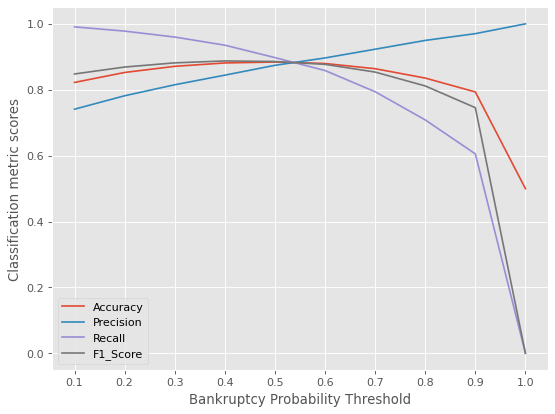

In [225]:
figure(figsize=(8, 6), dpi=80)
plt.style.use('ggplot')
plt.plot(cutoff_results_df['Accuracy'], label='Accuracy')
plt.plot(cutoff_results_df['Precision'], label='Precision')
plt.plot(cutoff_results_df['Recall'], label='Recall')
plt.plot(cutoff_results_df['F1_Score'], label='F1_Score')
plt.xticks(list(range(cutoff_results_df.shape[0])), cutoff_results_df['Threshold'])
plt.xlabel('Bankruptcy Probability Threshold')
plt.ylabel('Classification metric scores')
plt.legend()
plt.show()